In [38]:
#import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

treasury=pd.read_csv('C:\\Users\\Wincy\\Desktop\\UIUC\\Machine learning\\Treasury Squeeze test - DS1.csv')
print(treasury.head())
print(treasury.shape)

y = treasury.iloc[1:, -1]
X = treasury.iloc[1:,[3,6]]
print(X.shape,y.shape)

   rowindex      contract  price_crossing  price_distortion  roll_start  \
0         1  TUZ92 Comdty               0                 1           0   
1         2  TUH93 Comdty               0                 1           1   
2         3  TUM93 Comdty               0                 0           1   
3         4  TUU93 Comdty               1                 1           0   
4         5  TUZ93 Comdty               0                 0           1   

   roll_heart  near_minus_next  ctd_last_first  ctd1_percent  delivery_cost  \
0           1                1               1             1              0   
1           0                1               1             0              0   
2           1                0               0             0              0   
3           0                0               0             0              1   
4           1                1               1             1              0   

   delivery_ratio  squeeze  
0               0     True  
1               

In [39]:
#K-nearest neighbors – a lazy learning algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

# Split the dataset into a training and a testing set
# Test set will be the 30% taken randomly
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30, random_state=33)
print( X_train.shape, y_train.shape)

#Standardize the features
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

k_range = range(1, 26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_std,y_train)
    y_pred = knn.predict(X_test_std)
    scores.append(accuracy_score(y_test,y_pred))

scores
np.max(scores)
k_optimal = scores.index(np.max(scores)) + 1

(629, 2) (629,)


C:\Users\Wincy\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Wincy\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  
C:\Users\Wincy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


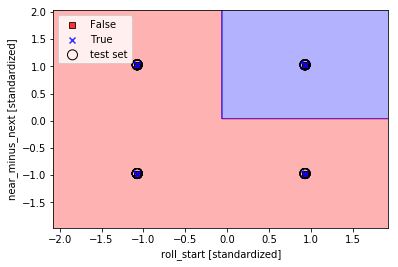

In [40]:
from sklearn.neighbors import KNeighborsClassifier
def plot_decision_regions(X, y, classifier, test_idx = None,resolution = 0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
        alpha=0.8, c=colors[idx],marker=markers[idx], label=cl,
        edgecolor='black')
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1],c='', edgecolor='black', alpha=1.0,linewidth=1, marker='o',s=100, label='test set')

knn = KNeighborsClassifier(n_neighbors=k_optimal)
knn.fit(X_train_std, y_train)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined_std, y_combined, classifier=knn, test_idx=range(105,150))
plt.xlabel('price_distortion [standardized]')
plt.ylabel('near_minus_next [standardized]')
plt.legend(loc='upper left')
plt.show()

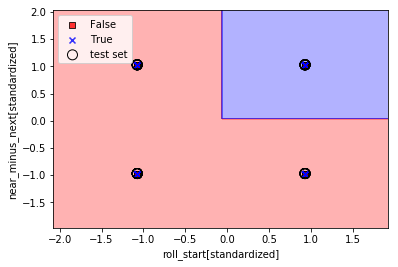

In [41]:
#Building a decision tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=1)
tree.fit(X_train_std, y_train)
X_combined_tree = np.vstack((X_train_std, X_test_std))
y_combined_tree = np.hstack((y_train, y_test))
plot_decision_regions(X_combined_tree,y_combined_tree,classifier=tree,test_idx=range(105, 150))
plt.xlabel('price_distortion[standardized]')
plt.ylabel('near_minus_next[standardized]')
plt.legend(loc='upper left')
plt.show()

In [42]:
print("My name is {Yunxi Wu}")
print("My NetID is: {yunxiw2}")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is {Yunxi Wu}
My NetID is: {yunxiw2}
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.


In [ ]:
https://github.com/yunxiwu/IE598_F19_HW2